In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import random
from numba import jit

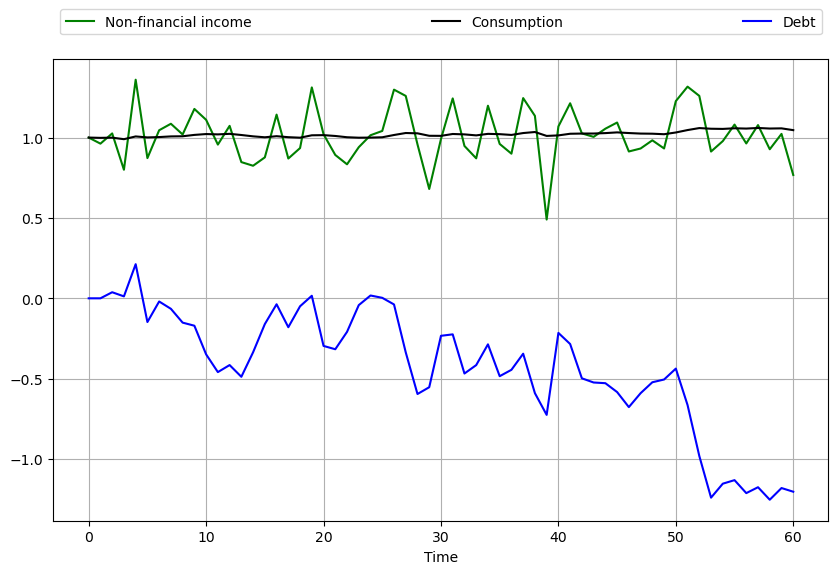

In [2]:
r = 0.05
β = 1 / (1 + r)
σ = 0.15
μ = 1
T = 60

@jit
def time_path(T):
    w = np.random.randn(T+1)  # w_0, w_1, ..., w_T
    w[0] = 0
    b = np.zeros(T+1)
    for t in range(1, T+1):
        b[t] = w[1:t].sum()
    b = -σ * b
    c = μ + (1 - β) * (σ * w - b)
    return w, b, c

w, b, c = time_path(T)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(μ + σ * w, 'g-', label="Non-financial income")
ax.plot(c, 'k-', label="Consumption")
ax.plot( b, 'b-', label="Debt")
ax.legend(ncol=3, mode='expand', bbox_to_anchor=(0., 1.02, 1., .102))
ax.grid()
ax.set_xlabel('Time')

plt.show()

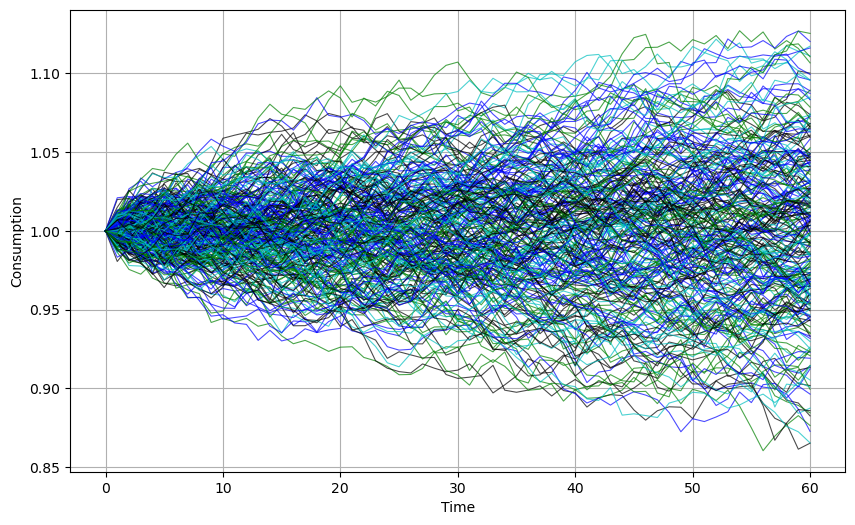

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

b_sum = np.zeros(T+1)
for i in range(250):
    w, b, c = time_path(T)  # Generate new time path
    rcolor = random.choice(('c', 'g', 'b', 'k'))
    ax.plot(c, color=rcolor, lw=0.8, alpha=0.7)

ax.grid()
ax.set(xlabel='Time', ylabel='Consumption')

plt.show()

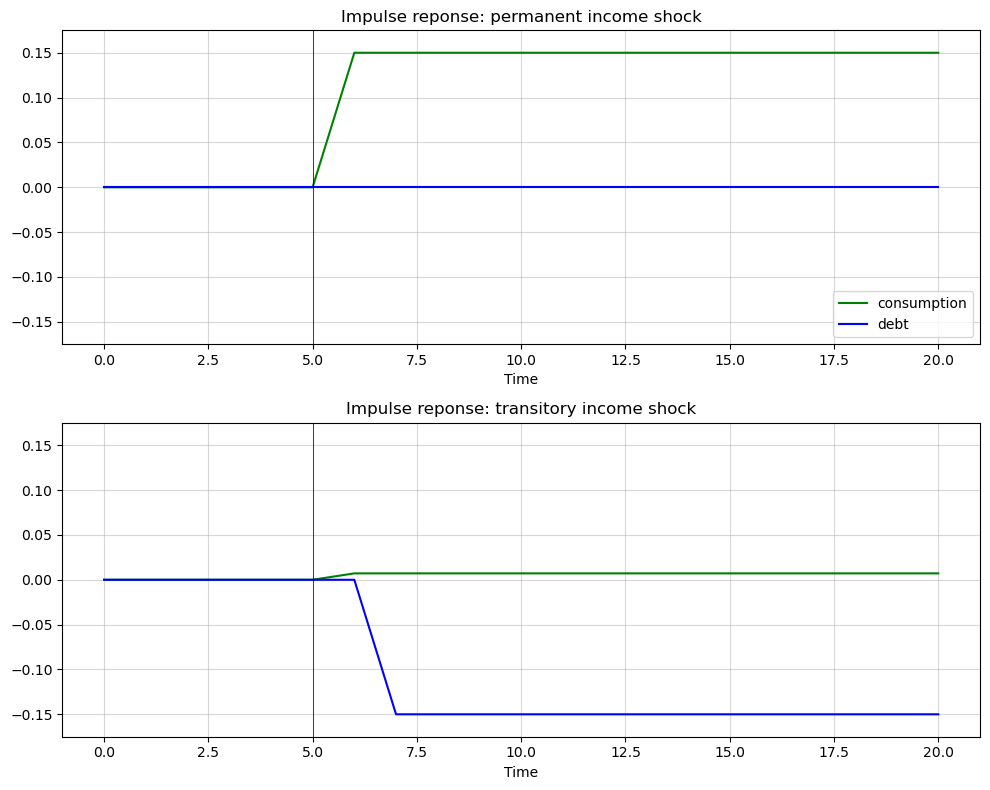

In [4]:
r = 0.05
β = 1 / (1 + r)
S = 5   # Impulse date
σ1 = σ2 = 0.15

@jit
def time_path(T, permanent=False):
    "Time path of consumption and debt given shock sequence"
    w1 = np.zeros(T+1)
    w2 = np.zeros(T+1)
    b = np.zeros(T+1)
    c = np.zeros(T+1)
    if permanent:
        w1[S+1] = 1.0
    else:
        w2[S+1] = 1.0
    for t in range(1, T):
        b[t+1] = b[t] - σ2 * w2[t]
        c[t+1] = c[t] + σ1 * w1[t+1] + (1 - β) * σ2 * w2[t+1]
    return b, c


fig, axes = plt.subplots(2, 1, figsize=(10, 8))
titles = ['permanent', 'transitory']

L = 0.175

for ax, truefalse, title in zip(axes, (True, False), titles):
    b, c = time_path(T=20, permanent=truefalse)
    ax.set_title(f'Impulse reponse: {title} income shock')
    ax.plot(c, 'g-', label="consumption")
    ax.plot(b, 'b-', label="debt")
    ax.plot((S, S), (-L, L), 'k-', lw=0.5)
    ax.grid(alpha=0.5)
    ax.set(xlabel=r'Time', ylim=(-L, L))

axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()